In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files

# Upload and load the dataset
uploaded = files.upload()

Saving project-data.csv to project-data.csv


In [4]:
data = pd.read_csv("project-data.csv",sep=';')


In [5]:
data.head()

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69
1,no_disease,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   category                     615 non-null    object 
 1   age                          615 non-null    int64  
 2   sex                          615 non-null    object 
 3   albumin                      614 non-null    float64
 4   alkaline_phosphatase         597 non-null    float64
 5   alanine_aminotransferase     614 non-null    float64
 6   aspartate_aminotransferase   615 non-null    float64
 7   bilirubin                    615 non-null    float64
 8   cholinesterase               615 non-null    float64
 9   cholesterol                  605 non-null    float64
 10  creatinina                   615 non-null    float64
 11  gamma_glutamyl_transferase   615 non-null    float64
 12  protein                      615 non-null    object 
dtypes: float64(9), int64

In [7]:
data.columns

Index(['category', 'age', 'sex', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin',
       'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase ', 'protein   '],
      dtype='object')

In [8]:
data.isnull().sum()

,0
category,0
age,0
sex,0
albumin,1
alkaline_phosphatase,18
alanine_aminotransferase,1
aspartate_aminotransferase,0
bilirubin,0
cholinesterase,0
cholesterol,10


In [9]:
data['alkaline_phosphatase'].fillna(data['alkaline_phosphatase'].mean(), inplace=True)


In [10]:
data['alanine_aminotransferase'].fillna(data['alanine_aminotransferase'].mean(), inplace=True)


In [11]:
data['cholesterol'].fillna(data['cholesterol'].mean(), inplace=True)


In [12]:
data['albumin'].fillna(data['albumin'].mean(), inplace=True)


In [13]:
data.isnull().sum()

,0
category,0
age,0
sex,0
albumin,0
alkaline_phosphatase,0
alanine_aminotransferase,0
aspartate_aminotransferase,0
bilirubin,0
cholinesterase,0
cholesterol,0


In [14]:
import pandas as pd
# Select only numeric columns before calculating correlation
numeric_data = data.select_dtypes(include=['number'])

# Calculate correlation matrix on numeric data
corr_matrix = numeric_data.corr()

In [15]:
data.isnull().sum()

,0
category,0
age,0
sex,0
albumin,0
alkaline_phosphatase,0
alanine_aminotransferase,0
aspartate_aminotransferase,0
bilirubin,0
cholinesterase,0
cholesterol,0


In [16]:
for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
        print(f'{col} Outliers:\n{outliers}')


age Outliers:
        category  age sex  albumin  alkaline_phosphatase  \
317   no_disease   77   m     52.2                  52.2   

     alanine_aminotransferase  aspartate_aminotransferase  bilirubin  \
317                      12.0                        23.5       10.9   

     cholinesterase  cholesterol  creatinina  gamma_glutamyl_transferase   \
317            5.51         4.41       103.0                         25.8   

    protein     
317       67.2  
albumin Outliers:
            category  age sex  albumin  alkaline_phosphatase  \
27        no_disease   34   m     29.0              41.60000   
42        no_disease   35   m     27.8              99.00000   
173       no_disease   47   m     55.4              61.20000   
216       no_disease   52   m     82.2              82.20000   
248       no_disease   55   m     28.1              65.50000   
259       no_disease   57   m     59.7              64.50000   
312       no_disease   70   m     27.8              85.70000   
3

In [17]:
data.columns

Index(['category', 'age', 'sex', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin',
       'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase ', 'protein   '],
      dtype='object')

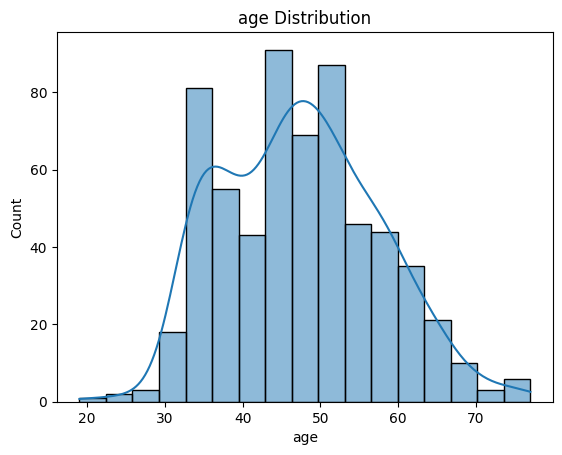

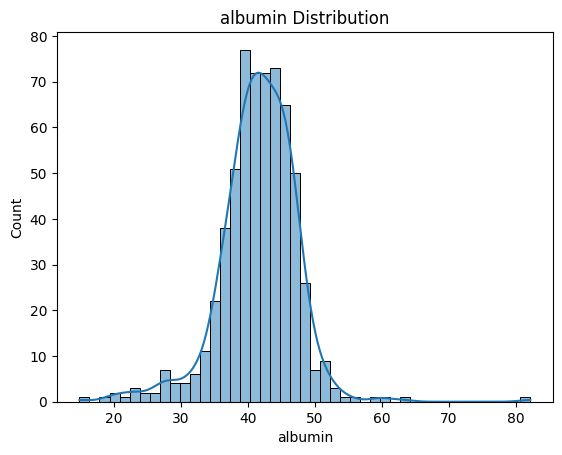

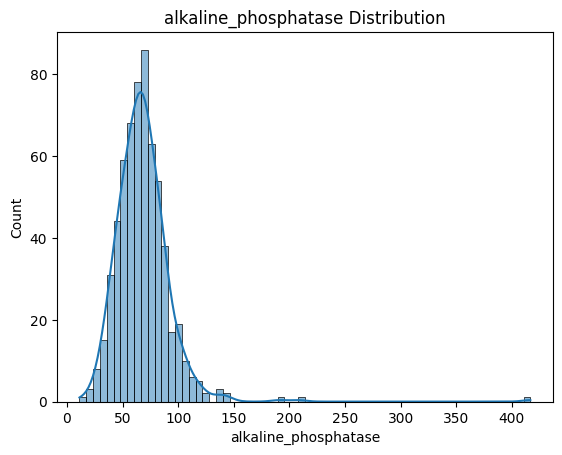

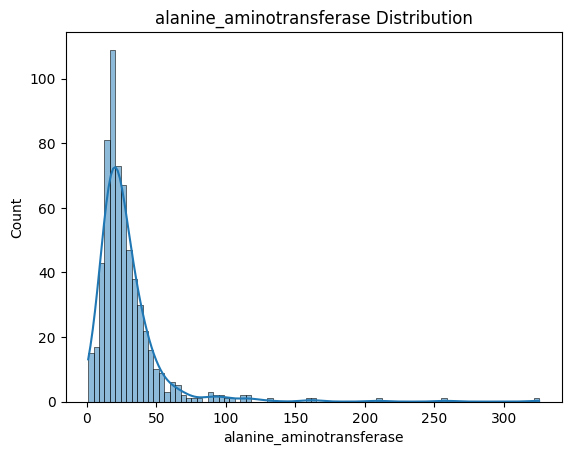

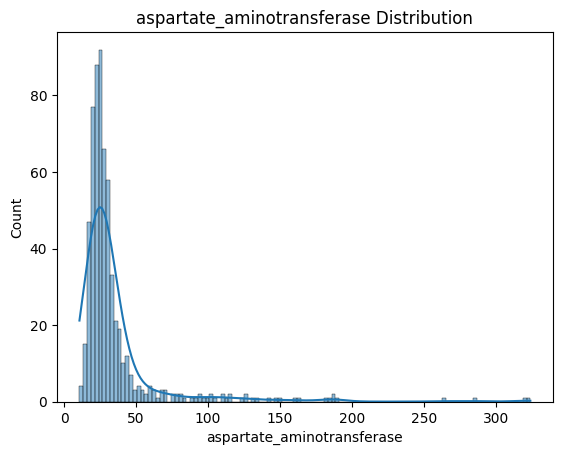

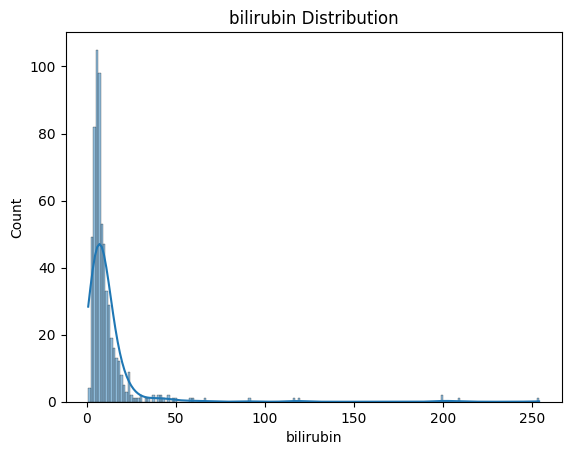

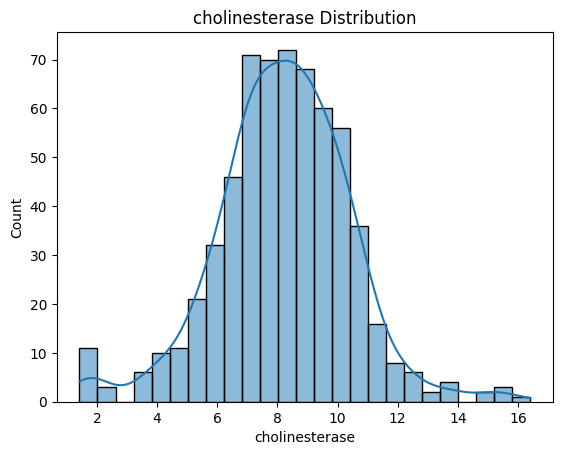

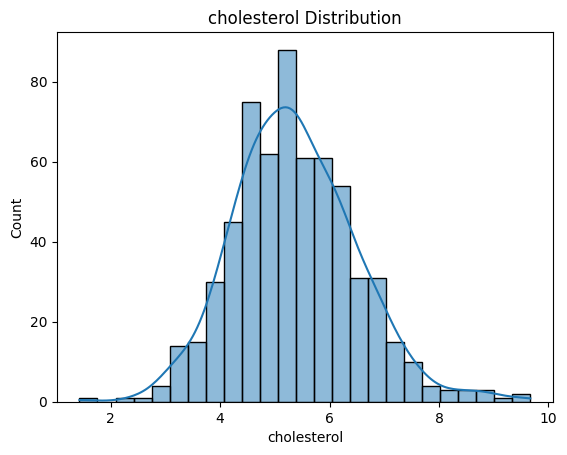

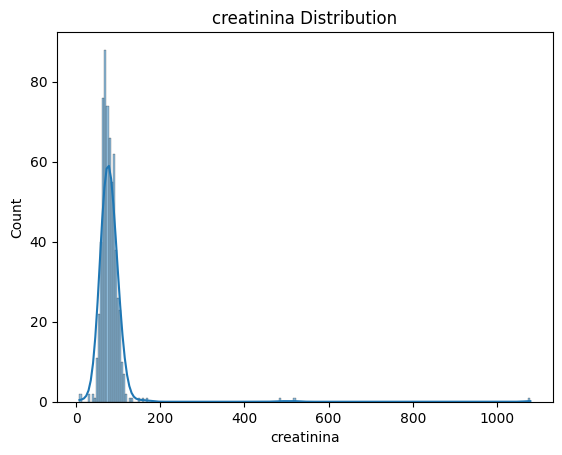

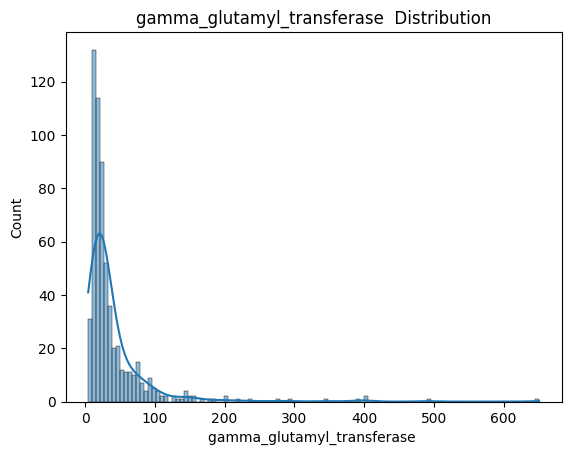

In [18]:
for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:
        sns.histplot(data[col], kde=True)
        plt.title(f'{col} Distribution')
        plt.show()


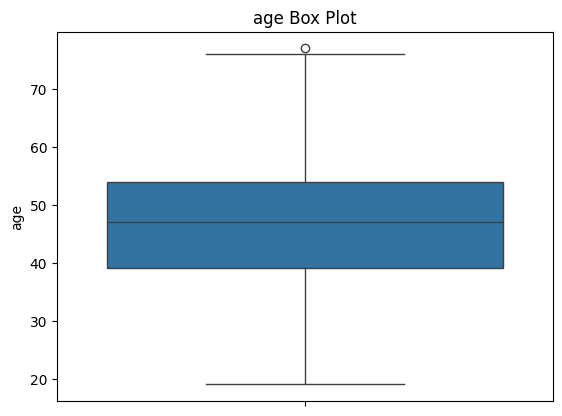

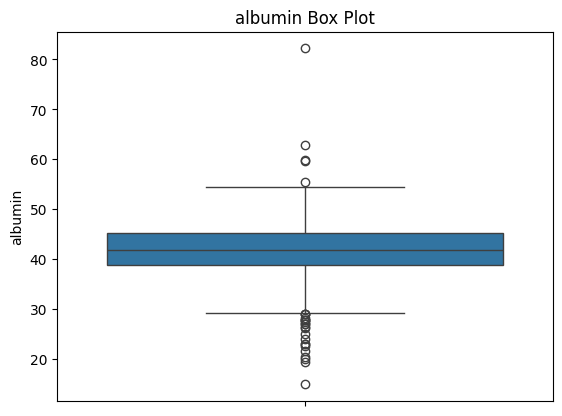

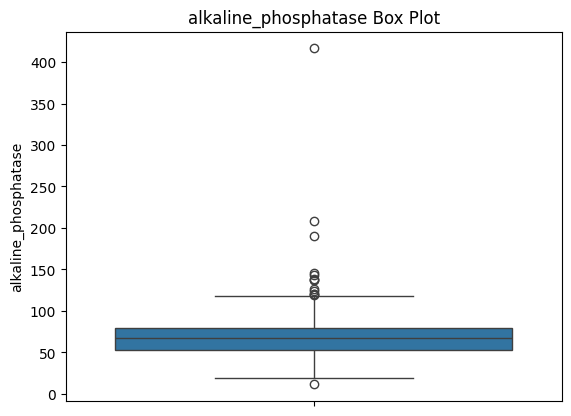

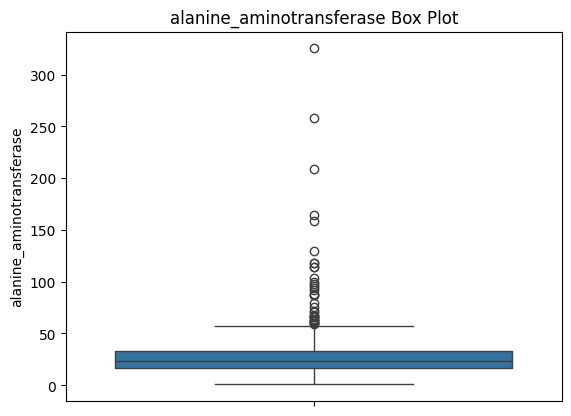

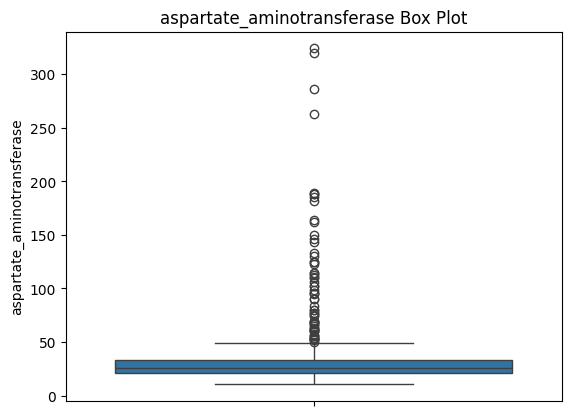

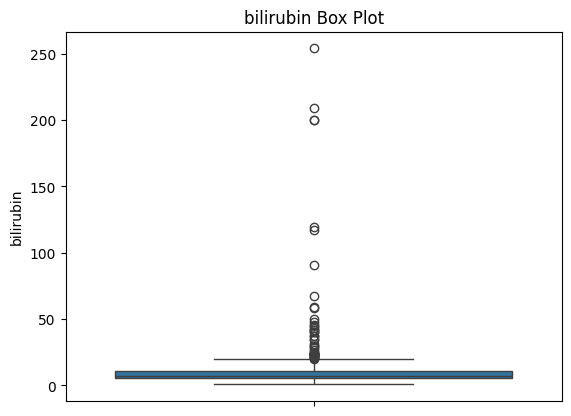

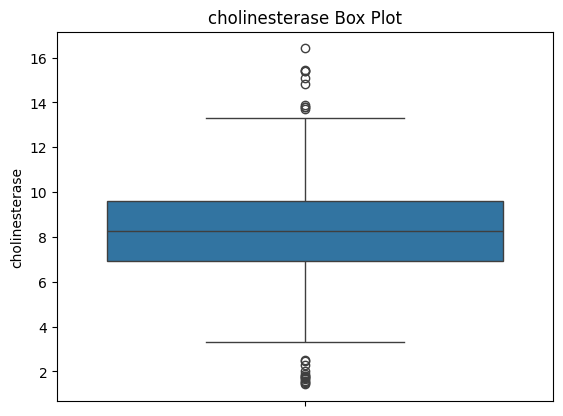

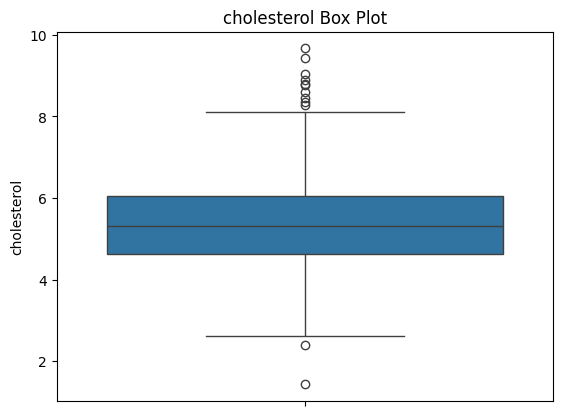

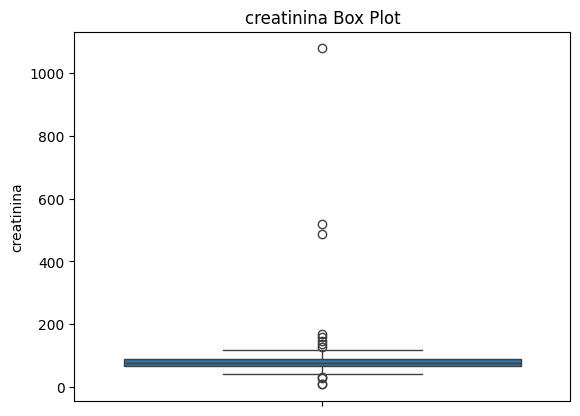

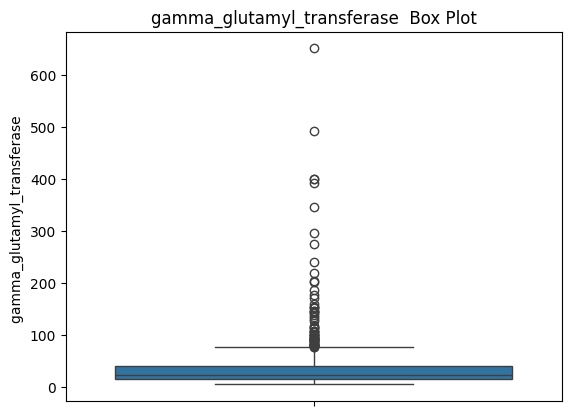

In [19]:
for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:
        sns.boxplot(data[col])
        plt.title(f'{col} Box Plot')
        plt.show()


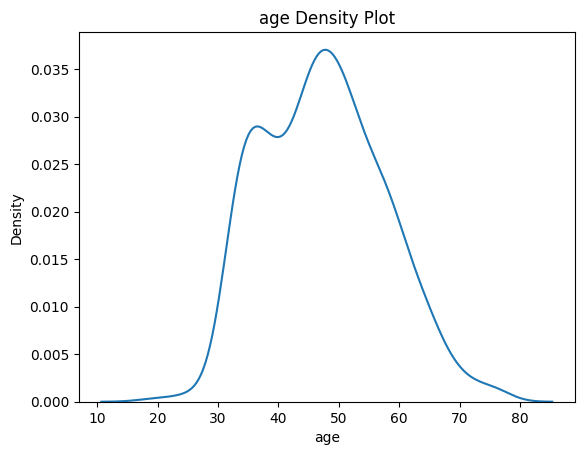

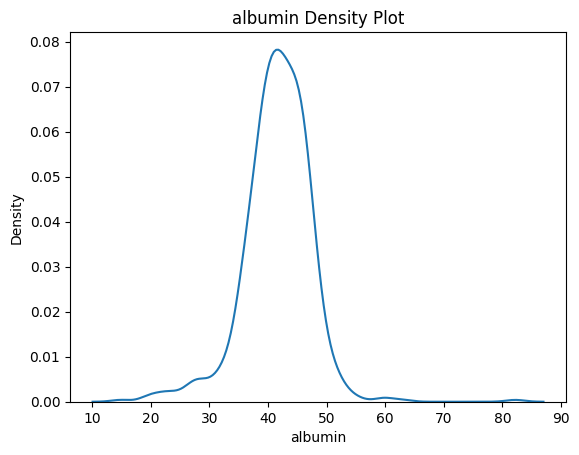

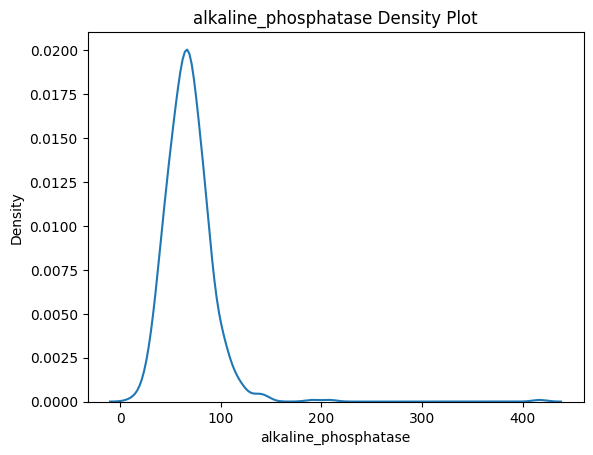

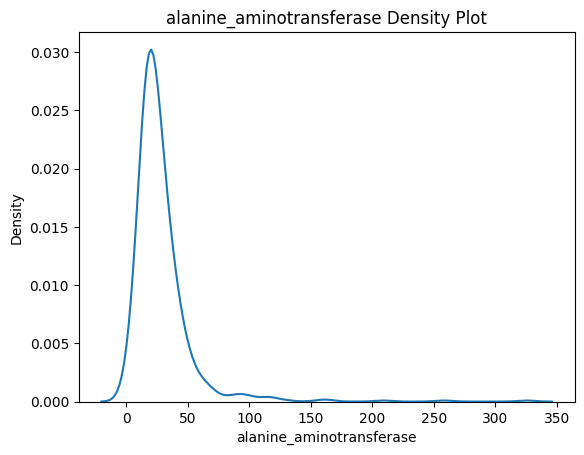

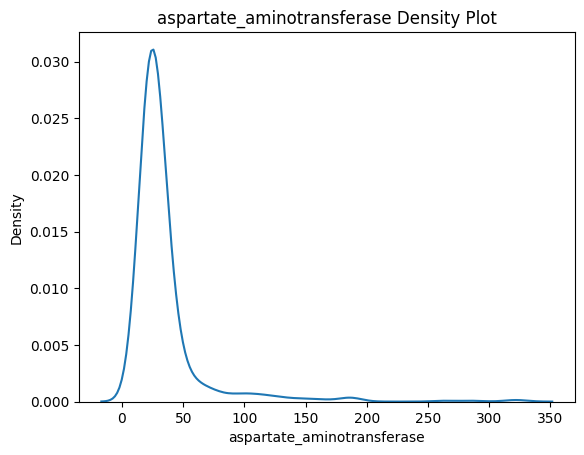

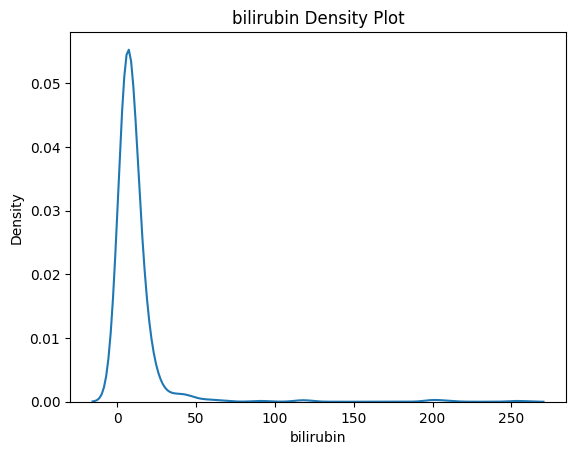

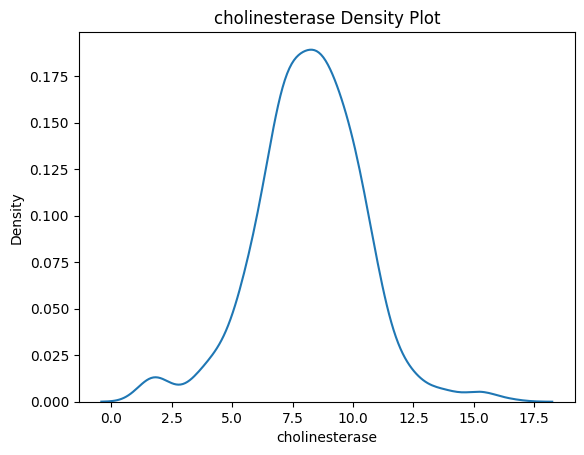

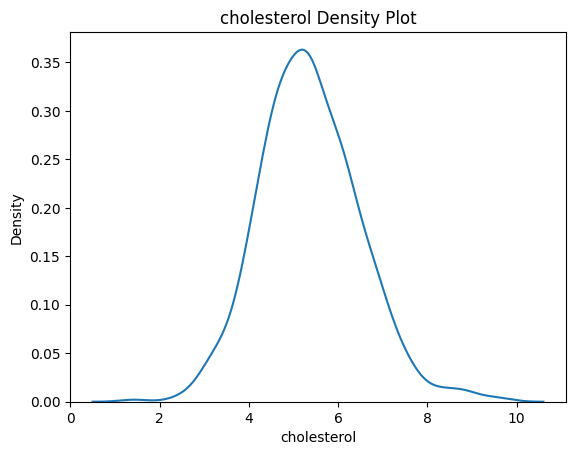

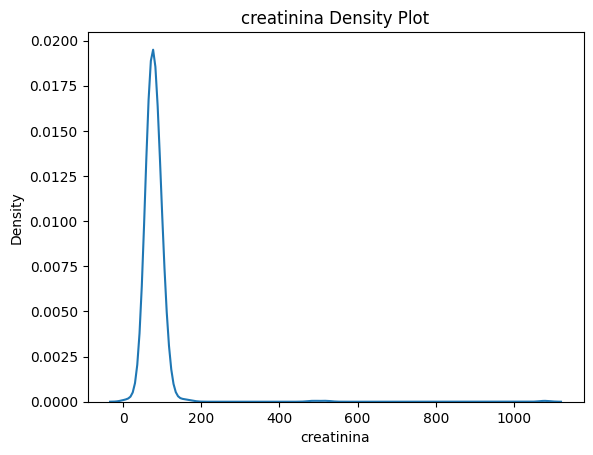

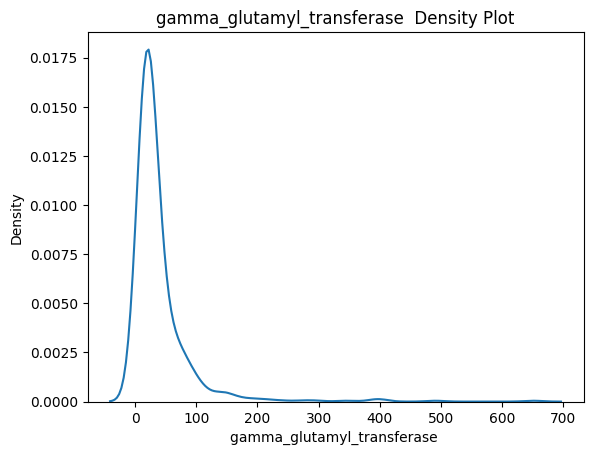

In [20]:
for col in data.columns:
    if data[col].dtype in ['int64', 'float64']:
        sns.kdeplot(data[col])
        plt.title(f'{col} Density Plot')
        plt.show()

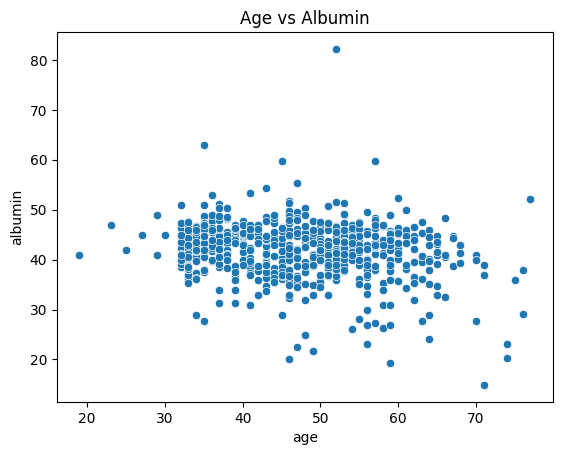

In [21]:
sns.scatterplot(x='age', y='albumin', data=data)
plt.title('Age vs Albumin')
plt.show()


In [22]:
data.columns

Index(['category', 'age', 'sex', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin',
       'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase ', 'protein   '],
      dtype='object')

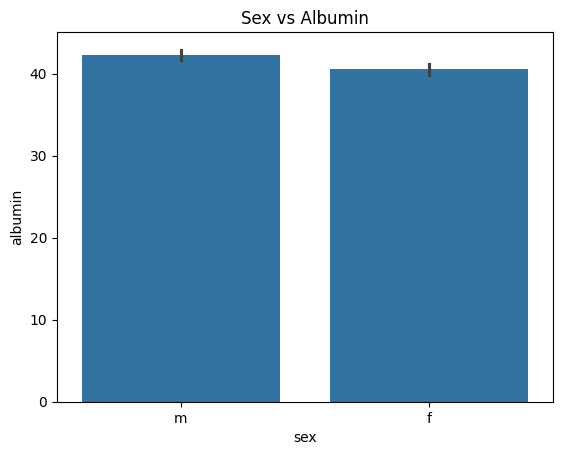

In [23]:
sns.barplot(x='sex', y='albumin', data=data)
plt.title('Sex vs Albumin')
plt.show()

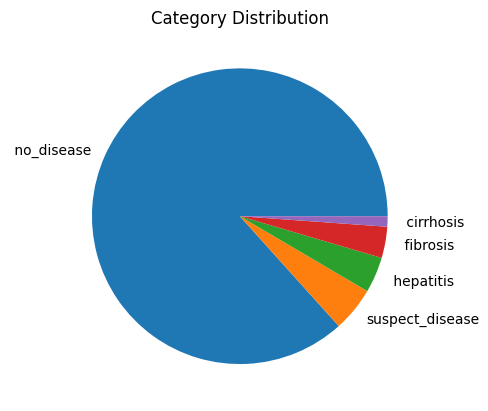

In [24]:
plt.pie(data['category'].value_counts(), labels=data['category'].unique())
plt.title('Category Distribution')
plt.show()


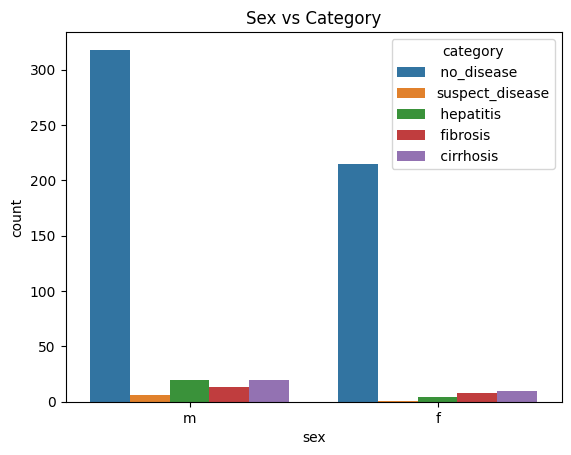

In [25]:
sns.countplot(x='sex', hue='category', data=data)
plt.title('Sex vs Category')
plt.show()


In [ ]:
print(data.describe())

In [26]:
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns
non_numeric_cols = data.select_dtypes(include=['object']).columns


corr_matrix = data[numeric_cols].corr()
corr_matrix

,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase
age,1.000000,-0.197005,0.168473,-0.006017,0.088666,0.032492,-0.075093,0.123978,-0.022296,0.153087
albumin,-0.197005,1.000000,-0.138858,0.001606,-0.193397,-0.221650,0.375848,0.204803,-0.001573,-0.155555
alkaline_phosphatase,0.168473,-0.138858,1.000000,0.172461,0.062202,0.048600,0.032971,0.121914,0.149554,0.442262
alanine_aminotransferase,-0.006017,0.001606,0.172461,1.000000,0.273325,-0.038468,0.146953,0.068023,-0.043025,0.248086
aspartate_aminotransferase,0.088666,-0.193397,0.062202,0.273325,1.000000,0.312231,-0.208536,-0.207507,-0.021387,0.491263
bilirubin,0.032492,-0.221650,0.048600,-0.038468,0.312231,1.000000,-0.333172,-0.156261,0.031224,0.217024
cholinesterase,-0.075093,0.375848,0.032971,0.146953,-0.208536,-0.333172,1.000000,0.420163,-0.011157,-0.110345
cholesterol,0.123978,0.204803,0.121914,0.068023,-0.207507,-0.156261,0.420163,1.000000,-0.047667,-0.006828
creatinina,-0.022296,-0.001573,0.149554,-0.043025,-0.021387,0.031224,-0.011157,-0.047667,1.000000,0.121003
gamma_glutamyl_transferase,0.153087,-0.155555,0.442262,0.248086,0.491263,0.217024,-0.110345,-0.006828,0.121003,1.000000


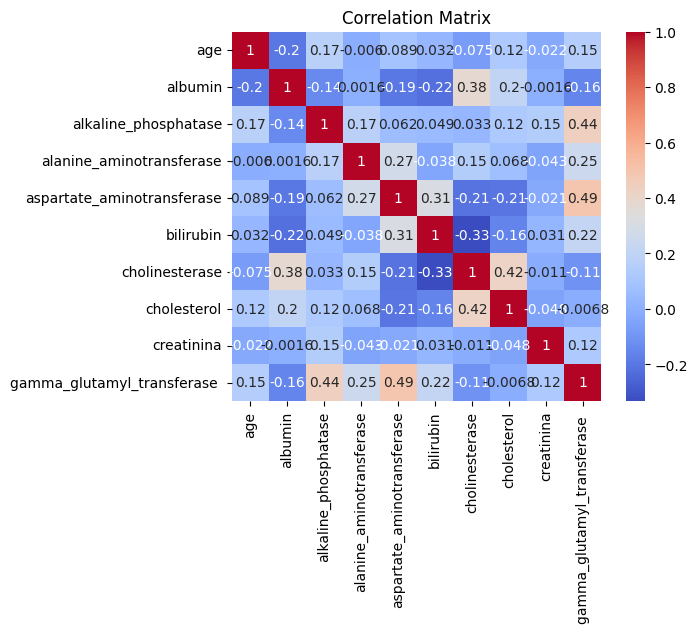

In [27]:
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix')
plt.show()


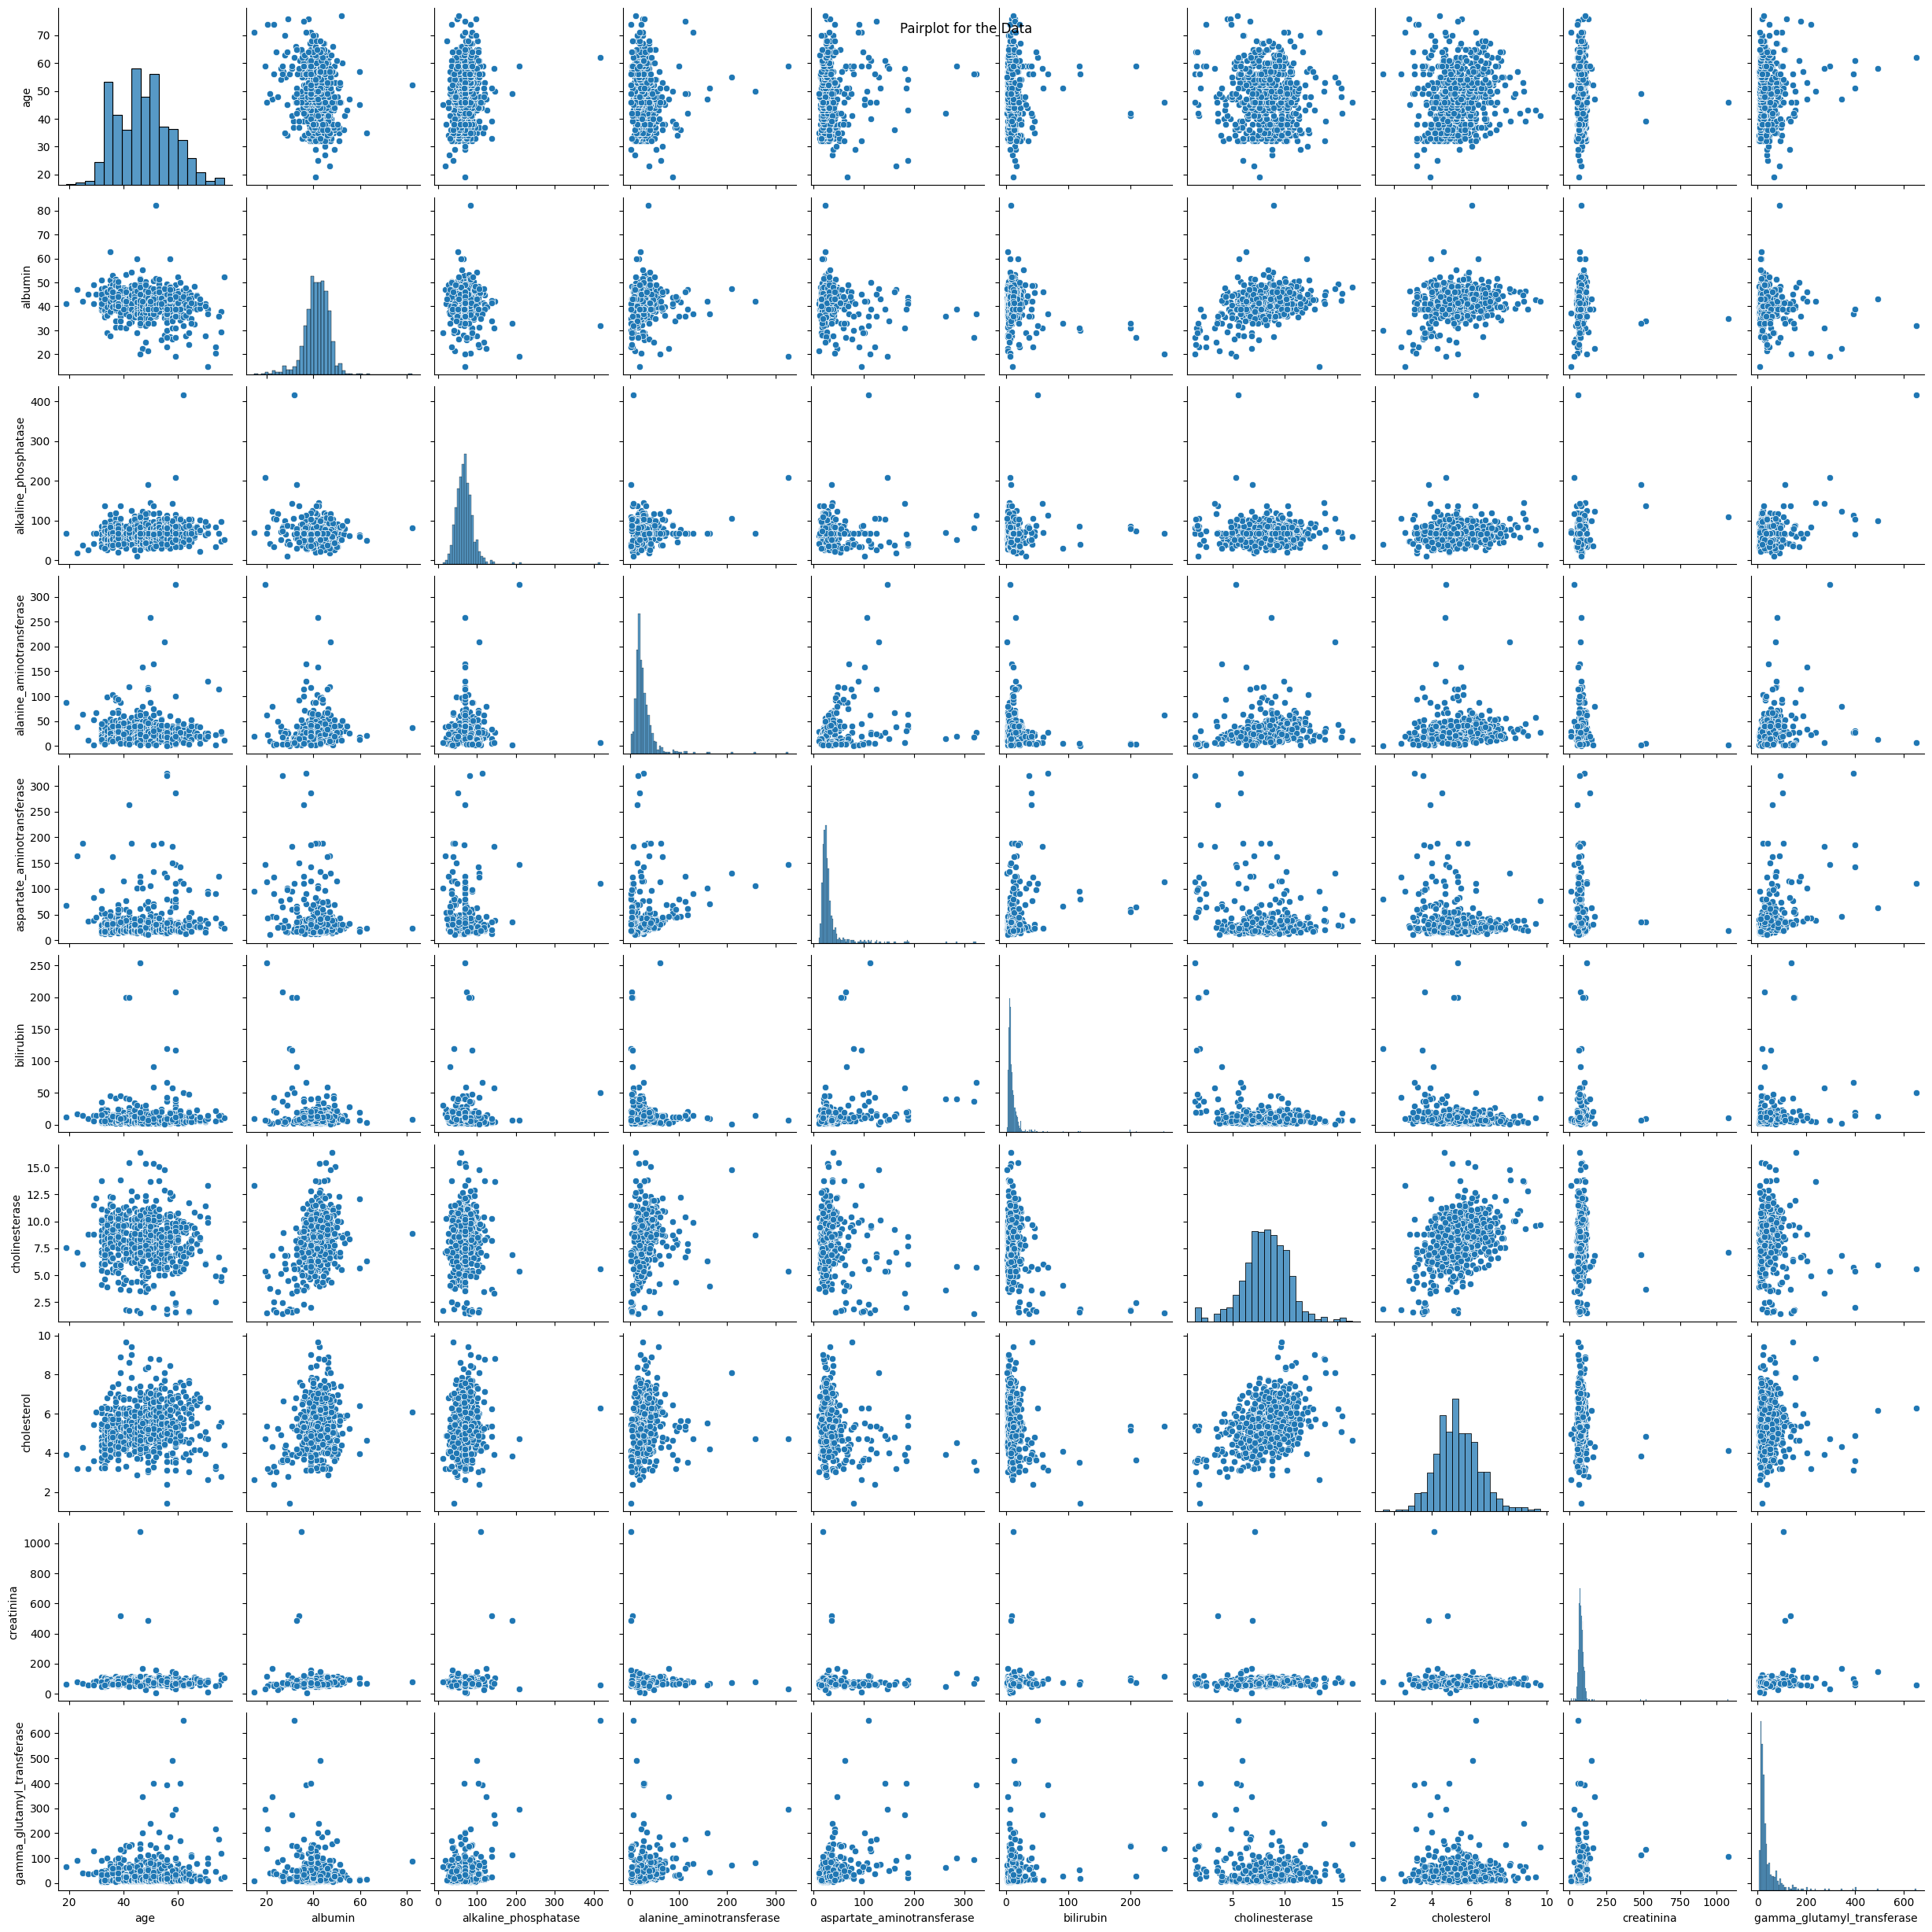

In [28]:
#Pairplot for the data
sns.pairplot(data)
plt.suptitle('Pairplot for the Data')
plt.show()

MODEL BUILDING


In [30]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.model_selection import cross_val_score

In [29]:
# Define target and features
target_col = 'category'  # Assuming 'category' is the target variable
features = data.drop(columns=[target_col])  # Drop target from features using data DataFrame
target = data[target_col]

In [31]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [32]:
!pip install scikit-learn


In [33]:
# Identify categorical features
categorical_features = data.select_dtypes(include=['object']).columns # Selects columns with 'object' dtype, which typically represents strings


In [34]:
# Create an OrdinalEncoder
encoder = OrdinalEncoder()


In [35]:
# Fit and transform the encoder on your categorical features
#  We're fitting on the entire dataset to ensure all categories are captured
data[categorical_features] = encoder.fit_transform(data[categorical_features])


In [37]:
# 4. Define target and features
target_col = 'category'
features = data.drop(columns=[target_col])
target = data[target_col]

In [36]:
# 5. Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


### Model 1 :- Logistic Regression

In [44]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder

# Assuming 'data' is your DataFrame and 'categorical_features' is a list of categorical column names

# 1. Split the data into training and test sets first
X_train, X_test, y_train, y_test = train_test_split(data.drop(columns=['category']), data['category'], test_size=0.2, random_state=42)

# 2. Initialize the LabelEncoder
encoder = LabelEncoder()

# 3. Fit and transform the encoder on the training data only
# Exclude the target column ('category') from the loop
for col in categorical_features:
    if col != 'category':  # This condition prevents trying to encode the target column
        # Fit on the combined unique values from both train and test
        all_values = pd.concat([X_train[col], X_test[col]]).unique()
        encoder.fit(all_values)

        X_train[col] = encoder.transform(X_train[col])
        # Transform the test data using the fitted encoder
        X_test[col] = encoder.transform(X_test[col])

# 4. Define target and features (already done in your code)
# target_col = 'category'
# features = data.drop(columns=[target_col])
# target = data[target_col]

# 5. Now you can train the model
clf1 = LogisticRegression()
clf1.fit(X_train, y_train)

LogisticRegression()

In [45]:
y_pred1 = clf1.predict(X_test)

In [47]:
print('Accuracy_score of Logistic Regression:',accuracy_score(y_test,y_pred1))
print('Logistic Regression of Confusion matrix :\n')
pd.DataFrame(confusion_matrix(y_test,y_pred1))


Accuracy_score of Logistic Regression: 0.8699186991869918
Logistic Regression of Confusion matrix :



,0,1,2,3,4
0,2,0,0,4,3
1,0,2,0,4,0
2,0,1,5,2,1
3,0,0,0,96,0
4,0,1,0,0,2


In [48]:
# To find the percision and recall :-

print("For Logistic regression Model: \n")
print("-"*50)
print('Precision Score:',precision_score(y_test,y_pred1,average='weighted'))
print('Recall score:',recall_score(y_test,y_pred1,average='weighted'))
print('F1 score:',f1_score(y_test,y_pred1,average='weighted'))

For Logistic regression Model: 

--------------------------------------------------
Precision Score: 0.8857186685074399
Recall score: 0.8699186991869918
F1 score: 0.8510744454236364


In [64]:
from sklearn.metrics import roc_auc_score

# Get probabilities for all classes
y_prob_all = clf1.predict_proba(X_test)

# Calculate ROC-AUC score using 'ovr' for multi-class
roc_auc = roc_auc_score(y_test, y_prob_all, multi_class='ovr')

print(f"ROC-AUC Score for Logistic Regression: {roc_auc:.2f}")

ROC-AUC Score for Logistic Regression: 0.87


In [65]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

         0.0       1.00      0.22      0.36         9
         1.0       0.50      0.33      0.40         6
         2.0       1.00      0.56      0.71         9
         3.0       0.91      1.00      0.95        96
         4.0       0.33      0.67      0.44         3

    accuracy                           0.87       123
   macro avg       0.75      0.56      0.57       123
weighted avg       0.89      0.87      0.85       123



In [66]:
result = pd.DataFrame()
result['Actual_Label'] = y_test
result['Logistic Regression Prediction'] = y_pred1


In [67]:
result.sample(10)

,Actual_Label,Logistic Regression Prediction
11,3.0,3.0
398,3.0,3.0
259,3.0,3.0
132,3.0,3.0
131,3.0,3.0
278,3.0,3.0
450,3.0,3.0
24,3.0,3.0
209,3.0,3.0
604,0.0,4.0


Feature Importance - Logistic Regression:
                        Feature  Importance
7                cholinesterase    0.320392
2                       albumin    0.230965
11                   protein       0.102773
9                    creatinina    0.072202
10  gamma_glutamyl_transferase     0.033677
1                           sex    0.030778
3          alkaline_phosphatase    0.027411
4      alanine_aminotransferase    0.026810
6                     bilirubin    0.026177
5    aspartate_aminotransferase    0.024134
0                           age    0.022017
8                   cholesterol    0.017260


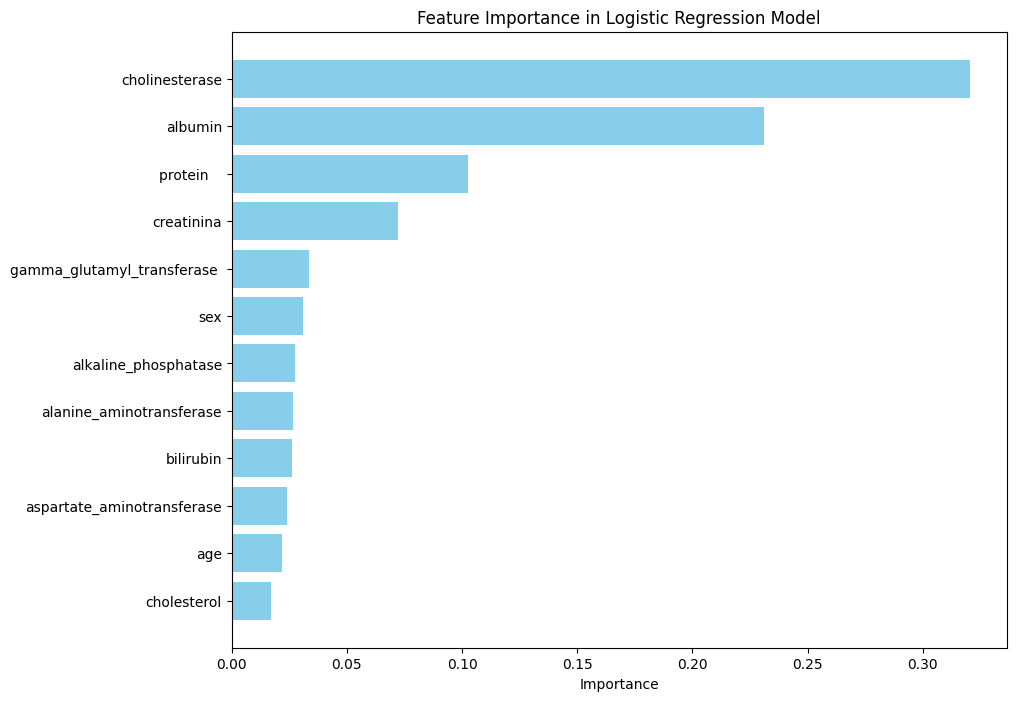

In [68]:
import pandas as pd
import numpy as np

# Get feature importance (coefficients) for Logistic Regression
# Ensure coefficients are available only if the model was trained successfully
if hasattr(clf1, 'coef_'):
    # Getting absolute values of coefficients for easier interpretation
    feature_importance = np.abs(clf1.coef_[0])
    feature_names = features.columns  # Assuming X is your DataFrame of features

    # Create a DataFrame to show features and their importance
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importance
    })

    # Sort features by importance
    importance_df = importance_df.sort_values(by="Importance", ascending=False)

    # Display feature importance
    print("Feature Importance - Logistic Regression:")
    print(importance_df)

    # Plot feature importance
    plt.figure(figsize=(10, 8))
    plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
    plt.xlabel("Importance")
    plt.title("Feature Importance in Logistic Regression Model")
    plt.gca().invert_yaxis()
    plt.show()

else:
    print("Logistic Regression model does not have coefficients. Make sure the model is trained.")


### Model 2 :- Decision Tree Classifier

In [69]:
clf2 = DecisionTreeClassifier()
clf2.fit(X_train,y_train)

DecisionTreeClassifier()

In [70]:
y_pred2 = clf2.predict(X_test)

In [71]:
print("Accuracy score of Decision Tree :",accuracy_score(y_test,y_pred2))

Accuracy score of Decision Tree : 0.8455284552845529


In [81]:
# To find the percision and recall :-

print("For Decision Tree Model: \n")
print("-"*50)
print('Precision Score:',precision_score(y_test,y_pred2,average='weighted'))
print('Recall score:',recall_score(y_test,y_pred2,average='weighted'))
print('F1 score:',f1_score(y_test,y_pred2,average='weighted'))

For Decision Tree Model: 

--------------------------------------------------
Precision Score: 0.8172875904583221
Recall score: 0.8455284552845529
F1 score: 0.8276164079822617


In [82]:
from sklearn.metrics import roc_auc_score

# Get probabilities for all classes
y_prob_all = clf2.predict_proba(X_test)

# Calculate ROC-AUC score using 'ovr' for multi-class
roc_auc = roc_auc_score(y_test, y_prob_all, multi_class='ovr')

print(f"ROC-AUC Score for Decision Tree: {roc_auc:.2f}")

ROC-AUC Score for Decision Tree: 0.68


In [74]:
from sklearn.tree import plot_tree

[Text(0.49122807017543857, 0.95, 'x[5] <= 54.15\ngini = 0.207\nsamples = 492\nvalue = [21, 15, 15, 437, 4]'),
 Text(0.24561403508771928, 0.85, 'x[9] <= 306.45\ngini = 0.066\nsamples = 447\nvalue = [3, 2, 8, 432, 2]'),
 Text(0.3684210526315789, 0.8999999999999999, 'True  '),
 Text(0.21052631578947367, 0.75, 'x[3] <= 33.65\ngini = 0.053\nsamples = 444\nvalue = [0, 2, 8, 432, 2]'),
 Text(0.14035087719298245, 0.65, 'x[10] <= 18.6\ngini = 0.571\nsamples = 7\nvalue = [0, 1, 4, 2, 0]'),
 Text(0.10526315789473684, 0.55, 'x[4] <= 10.6\ngini = 0.625\nsamples = 4\nvalue = [0, 1, 1, 2, 0]'),
 Text(0.07017543859649122, 0.45, 'x[9] <= 69.85\ngini = 0.5\nsamples = 2\nvalue = [0, 1, 1, 0, 0]'),
 Text(0.03508771929824561, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1, 0, 0]'),
 Text(0.10526315789473684, 0.35, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0, 0, 0]'),
 Text(0.14035087719298245, 0.45, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 0, 2, 0]'),
 Text(0.17543859649122806, 0.55, 'gini = 0.0\nsamples 

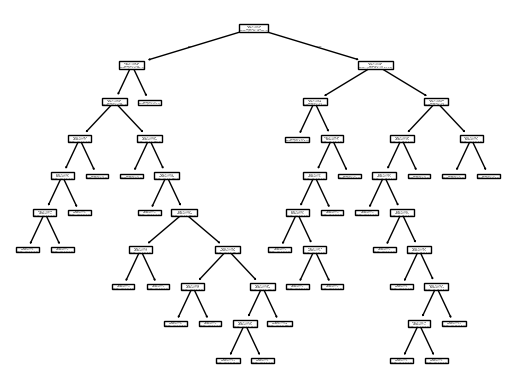

In [75]:
plot_tree(clf2)

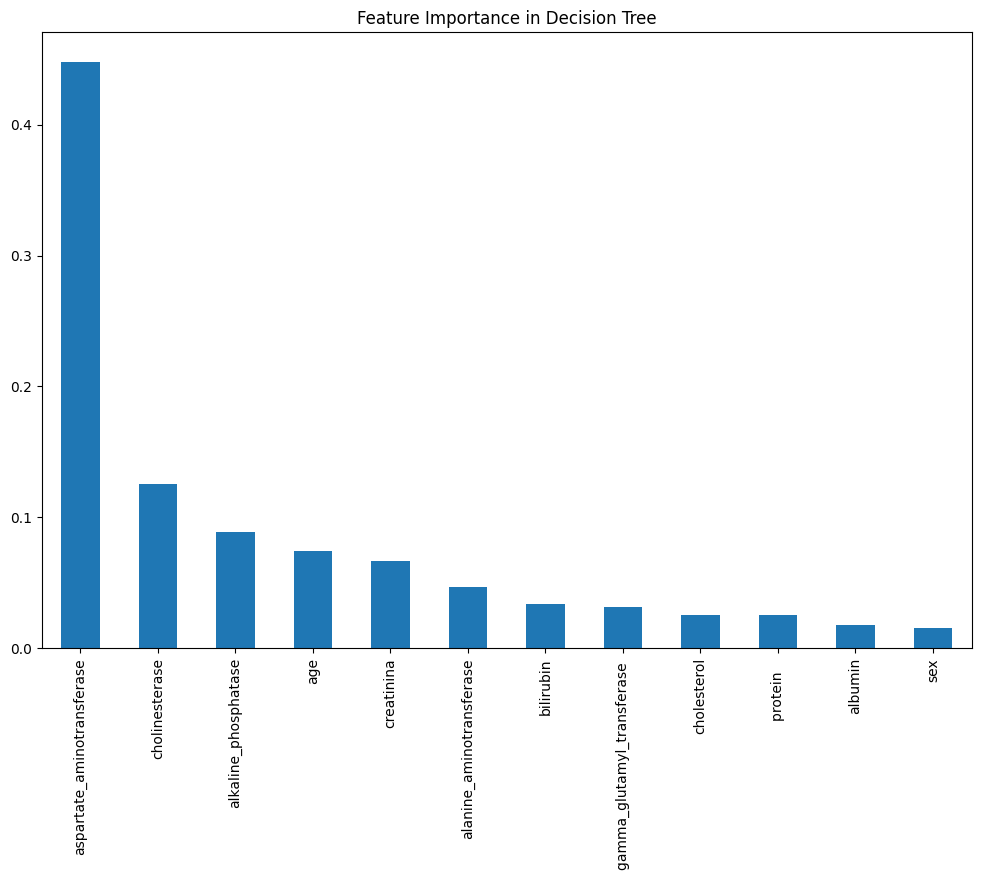

In [76]:
# Visualize feature importance
plt.figure(figsize=(12, 8))
feature_importance = pd.Series(clf2.feature_importances_, index=features.columns).sort_values(ascending=False)
feature_importance.plot(kind='bar')
plt.title('Feature Importance in Decision Tree')
plt.show()

In [77]:
import pandas as pd
result = pd.DataFrame()
result['Actual_Label'] = y_test
result['Logistic Regression Prediction'] = y_pred1
result['Decision Tree Prediction'] = y_pred2
result.sample(10)

,Actual_Label,Logistic Regression Prediction,Decision Tree Prediction
290,3.0,3.0,3.0
73,3.0,3.0,3.0
268,3.0,3.0,3.0
585,0.0,3.0,0.0
278,3.0,3.0,3.0
311,3.0,3.0,3.0
532,3.0,3.0,3.0
607,0.0,0.0,2.0
551,2.0,3.0,2.0
81,3.0,3.0,3.0


### Model 3 :- Random Forest :-

In [78]:
clf3 = RandomForestClassifier(max_samples=0.75,random_state=42)

clf3.fit(X_train,y_train)

RandomForestClassifier(max_samples=0.75, random_state=42)

In [79]:
y_pred3 = clf3.predict(X_test)

In [80]:
print('Accuracy_score:',accuracy_score(y_test,y_pred3))
print('cross val score:',np.mean(cross_val_score(RandomForestClassifier(max_samples=0.75),features,target,cv=10,scoring='accuracy')))

Accuracy_score: 0.8699186991869918
cross val score: 0.9218667371760972


In [83]:
# To find the percision and recall :-

print("For Random Forest Model: \n")
print("-"*50)
print('Precision Score:',precision_score(y_test,y_pred3,average='weighted'))
print('Recall score:',recall_score(y_test,y_pred3,average='weighted'))
print('F1 score:',f1_score(y_test,y_pred3,average='weighted'))

For Random Forest Model: 

--------------------------------------------------
Precision Score: 0.8518847006651885
Recall score: 0.8699186991869918
F1 score: 0.8420790906938197


In [84]:
from sklearn.metrics import roc_auc_score

# Get probabilities for all classes
y_prob_all = clf3.predict_proba(X_test)

# Calculate ROC-AUC score using 'ovr' for multi-class
roc_auc = roc_auc_score(y_test, y_prob_all, multi_class='ovr')

print(f"ROC-AUC Score for Random Forest: {roc_auc:.2f}")

ROC-AUC Score for Random Forest: 0.96


In [85]:
# By tunning the hyperparameter :-

# Number of trees in random forest
n_estimators=[20,60,100,120]

# number of features considered as every split
max_features=[0.2,0.6,1.0]

# Maximum no of levels in tree :-
max_depth = [2,8,None]

# number of samples
max_samples=[0.5,0.75,1.0]


In [86]:
param_grid = {'n_estimators':n_estimators,
             'max_features':max_features,
             'max_depth':max_depth,
             'max_samples':max_samples
             }
print(param_grid)

{'n_estimators': [20, 60, 100, 120], 'max_features': [0.2, 0.6, 1.0], 'max_depth': [2, 8, None], 'max_samples': [0.5, 0.75, 1.0]}


In [87]:
from sklearn.model_selection import GridSearchCV

clf3_grid = GridSearchCV(estimator =clf3,
                      param_grid=param_grid,
                      cv=5,
                      verbose=2,
                      n_jobs=-1)

In [88]:
clf3_grid.fit(X_train,y_train)

Fitting 5 folds for each of 108 candidates, totalling 540 fits


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_samples=0.75,
                                              random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [2, 8, None],
                         'max_features': [0.2, 0.6, 1.0],
                         'max_samples': [0.5, 0.75, 1.0],
                         'n_estimators': [20, 60, 100, 120]},
             verbose=2)

In [89]:
clf3_grid.best_params_

{'max_depth': 8, 'max_features': 0.2, 'max_samples': 1.0, 'n_estimators': 20}

In [91]:
clf3_grid.best_score_

0.9370232941661513

In [92]:
# feature importance :-
clf3.feature_importances_

array([0.05959461, 0.00691319, 0.06166149, 0.08920108, 0.11176807,
       0.25011919, 0.06492467, 0.10793833, 0.05518731, 0.04771546,
       0.07660496, 0.06837163])

In [93]:
clf3.feature_importances_ .shape

(12,)

In [94]:
import pandas as pd
result = pd.DataFrame()
result['Actual_Label'] = y_test
result['Logistic Regression Prediction'] = y_pred1
result['Decision Tree Prediction'] = y_pred2
result['Random Forest Prediction'] = y_pred3
result.sample(10)

,Actual_Label,Logistic Regression Prediction,Decision Tree Prediction,Random Forest Prediction
132,3.0,3.0,3.0,3.0
318,3.0,3.0,3.0,3.0
208,3.0,3.0,3.0,3.0
336,3.0,3.0,3.0,3.0
555,2.0,2.0,3.0,3.0
118,3.0,3.0,3.0,3.0
211,3.0,3.0,3.0,3.0
544,2.0,2.0,2.0,2.0
381,3.0,3.0,3.0,3.0
188,3.0,3.0,3.0,3.0


### Model 4 :- KNN

In [95]:
clf4 = KNeighborsClassifier(n_neighbors=3)

In [96]:
clf4.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [97]:
y_pred4 = clf4.predict(X_test)

In [98]:
print('Accuracy score:',accuracy_score(y_test,y_pred4))

Accuracy score: 0.8211382113821138


In [99]:
# To find the percision and recall :-

print("For KNN Model: \n")
print("-"*50)
print('Precision Score:',precision_score(y_test,y_pred4,average='weighted'))
print('Recall score:',recall_score(y_test,y_pred4,average='weighted'))
print('F1 score:',f1_score(y_test,y_pred4,average='weighted'))

For KNN Model: 

--------------------------------------------------
Precision Score: 0.7342074969422261
Recall score: 0.8211382113821138
F1 score: 0.7670344204362177


In [100]:
from sklearn.metrics import roc_auc_score

# Get probabilities for all classes
y_prob_all = clf4.predict_proba(X_test)

# Calculate ROC-AUC score using 'ovr' for multi-class
roc_auc = roc_auc_score(y_test, y_prob_all, multi_class='ovr')

print(f"ROC-AUC Score for Random Forest: {roc_auc:.2f}")

ROC-AUC Score for Random Forest: 0.66


In [102]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   category                     615 non-null    float64
 1   age                          615 non-null    int64  
 2   sex                          615 non-null    float64
 3   albumin                      615 non-null    float64
 4   alkaline_phosphatase         615 non-null    float64
 5   alanine_aminotransferase     615 non-null    float64
 6   aspartate_aminotransferase   615 non-null    float64
 7   bilirubin                    615 non-null    float64
 8   cholinesterase               615 non-null    float64
 9   cholesterol                  615 non-null    float64
 10  creatinina                   615 non-null    float64
 11  gamma_glutamyl_transferase   615 non-null    float64
 12  protein                      615 non-null    float64
dtypes: float64(12), int6

In [101]:
data.columns

Index(['category', 'age', 'sex', 'albumin', 'alkaline_phosphatase',
       'alanine_aminotransferase', 'aspartate_aminotransferase', 'bilirubin',
       'cholinesterase', 'cholesterol', 'creatinina',
       'gamma_glutamyl_transferase ', 'protein   '],
      dtype='object')

In [110]:
category_counts = data['category'].value_counts()

print(category_counts)

category
3.0    533
0.0     30
2.0     24
1.0     21
4.0      7
Name: count, dtype: int64


In [125]:
Age=int(input("Enter age"))
sex=float(input("Enter value for sex --->0(F)/1(M)"))
albumin=float(input("Enter value for albumin"))
alkaline_phosp=float(input("Enter value for alkaline_phosp"))
alanine_aminotransferase=float(input("Enter value for alanine_aminotransferase"))
asparate_aminotransferase=float(input("Enter value for asparate_aminotransferase"))

bilirubin=float(input("Enter value for bilirubin"))
cholinesterase=float(input("Enter value for cholinesterase"))
cholesterol=float(input("Enter value for cholesterol"))
creatinina=float(input("Enter value for creatinina"))
gamma_glutamyl_transferase=float(input("Enter value for gamma_glutamyl_transferase"))
protein=float(input("Enter value for protein"))

Enter age32
Enter value for sex --->0(F)/1(M)1
Enter value for albumin38.5
Enter value for alkaline_phosp52.5
Enter value for alanine_aminotransferase7.7
Enter value for asparate_aminotransferase22.1
Enter value for bilirubin7.5
Enter value for cholinesterase6.93
Enter value for cholesterol3.23
Enter value for creatinina106.0
Enter value for gamma_glutamyl_transferase12.1
Enter value for protein69


In [126]:
user_input=np.array([[Age, sex, albumin, alkaline_phosp,
       alanine_aminotransferase, asparate_aminotransferase,bilirubin,
       cholinesterase, cholesterol, creatinina,
       gamma_glutamyl_transferase, protein ]])
print(user_input)
prediction=clf3.predict(user_input)[0]
print(prediction)
if prediction==0.0:
  print("cirrhosis")
elif prediction==1.0:
  print("fibrosis")
elif prediction==2.0:
  print("hepatitis")
elif prediction==3.0:
  print("No_disease")
else:
  print("suspect_disease")


[[ 32.     1.    38.5   52.5    7.7   22.1    7.5    6.93   3.23 106.
   12.1   69.  ]]
3.0
No_disease


In [127]:
import pickle

In [128]:
with open("liver-disease.pkl",'wb') as f:
  pickle.dump(clf3,f)

In [130]:
pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.9/41.9 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 44.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 44.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.3/79.3 kB 3.5 MB/s eta 0:00:00
